# Lending Club Case Study

## Introduction
### Goal
How data can be used minimize the risk of losing money while lending to customers.
### Context of Problem
This company is the largest **online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures**. Borrowers can easily access lower interest rate loans through a fast online interface. Like most other lending companies, lending loans to **‘risky’** applicants is the largest source of financial loss (called credit loss). **Credit loss** is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 
### Target
Reduce the Credit Loss by using EDA techniques to find driving factors for the defaulting of loan.
### Risk associated with the problem
 - If the applicant is likely to repay the loan, then not approving loan is a loss of business (rejecting loans for non - default).
 - If the applicant is not likely to repay the loan, then approving loan may lead to financial loss (approving loans for default).

In [2]:
# Steps of analysis:
# 1. Data Understanding
# 2. Data Wrangling
# 3. Data Visualization and Analysis
# 4. Conclusion

### Loading Libraries and Data

In [1]:
#importing Libraries for data manipulation
import pandas as pd 
import numpy as np 
#importing Libraries for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
# Warnings library will be used to ignore some warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data and data dictionary via pandas's read methods for excel and csv
loan_data = pd.read_csv('loan.csv')

### Setting Dataframe display options

In [3]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Setting style for seaonrn
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

### Printing the first 5 rows of the dataframe and data dictionary

In [4]:
# Printing the data(first 5 rows)
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Basic information about the data

In [5]:
#Basic information about the data
## Number of rows and columns
print('Number of Columns:',loan_data.shape[1])
print('Number of Rows:',loan_data.shape[0])
## Number of missing values
print('Number of missing values:',loan_data.isnull().sum().sum())
## Number of unique values
print('Number of unique values:',loan_data.nunique().sum())
## Number of duplicates
print('Number of duplicates:',loan_data.duplicated().sum())

Number of Columns: 111
Number of Rows: 39717
Number of missing values: 2263366
Number of unique values: 416800
Number of duplicates: 0


In [6]:
# Basic infomation about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [7]:
# Data types of each column
print(loan_data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [8]:
# Describing the dataframe
print(loan_data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [10]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


### Cleaning the large null value columns and rows

In [11]:
## Checking for missing values
print(loan_data.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [12]:
# Checking column with large amount of null values(in percentage) and irrelevant columns
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [13]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
loan_data = loan_data.loc[:,loan_data.isnull().sum()/loan_data.shape[0]*100<50]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 54)


In [16]:
# Checking columns again for null value percentage
print((loan_data.isnull().sum()/loan_data.shape[0]*100).round(2).sort_values(ascending=False))

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

We have removed the column which contain more than 50% missing values which will reduce impact on analyis and imporve the accuracy of the analysis.

In [14]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [15]:
# Checking for missing values across the rows
print((loan_data.isnull().sum(axis=1)).max())

6


As the max number of missing value in row is very low compared to the count of columns(54 after removing irrelevant columns), we can move ahead with process as the impact is insignificant.

### Removing the irrelevant columns

In [16]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
loan_data=loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
# Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
loan_data=loan_data.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
loan_data=loan_data.drop(['zip_code'],axis=1)
# Removing member_id as it is a duplicate index column and is not required for the analysis
loan_data=loan_data.drop(['member_id'],axis=1)
# Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
loan_data=loan_data.drop(['funded_amnt_inv'],axis=1)
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 26)


Removed the above columns as they are customer behavior variables and are not available at time of decision and hence not useful for analysis.

In [17]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(loan_data.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


As there are many columns with 1 unique value and null values, we have removed them as they are not relevant to the analysis.

In [18]:
# Removing irrelevant columns which contain 1 unique value
loan_data = loan_data.loc[:,loan_data.nunique()>1]
# Shape of the dataframe after removing columns
print(loan_data.shape)

(39717, 18)


In [19]:
# Columns in the dataframe
print(loan_data.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


As we are done removing the irrelevant columns, we can move ahead with the analysis and check for null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

### Removing and fixing the null values

In [20]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum().sort_values(ascending=False))

emp_length              1075
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
id                         0
loan_amnt                  0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt                0
home_ownership             0
dtype: int64


| **Column name** | **Count of Null values** |
|---|---|
|  emp_length | 1075  |
|  pub_rec_bankruptcies | 697  |

The above columns has null values which can be removed or fixed depending on the relevance of the column to objective of the analysis.

In [21]:
# Checking values in emp_length columns for feasibility of inserting null values
print(loan_data.emp_length.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [22]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_data.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


As for column 'emp_length', we can remove the null values as fixing null values are not feasible and will lead to loss of information.

In [23]:
# Removing null values in emp_title and emp_length columns
loan_data = loan_data.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(loan_data.shape)

(38642, 18)


As for the column 'pub_rec_bankruptcies', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

In [24]:
# Inserting 0 for null values in pub_rec_bankruptcies column
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)

In [25]:
# Checking for missing values across the dataframe
print(loan_data.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


We are done with fixing and removing null values to improve the accuracy of the analysis.

In [26]:
# Shape of the dataframe
print(loan_data.shape)

(38642, 18)


### Removing duplicate rows from the dataframe

In [27]:
# Removing duplicate rows in the dataframe
loan_data = loan_data.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loan_data.shape)

# No duplicate rows found in the dataframe

(38642, 18)


### Correcting Data Types and Deriving New Columns

In [28]:
# Checking information about the dataframe
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  int64  
 1   loan_amnt             38642 non-null  int64  
 2   funded_amnt           38642 non-null  int64  
 3   term                  38642 non-null  object 
 4   int_rate              38642 non-null  object 
 5   installment           38642 non-null  float64
 6   grade                 38642 non-null  object 
 7   sub_grade             38642 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        38642 non-null  object 
 10  annual_inc            38642 non-null  float64
 11  verification_status   38642 non-null  object 
 12  issue_d               38642 non-null  object 
 13  loan_status           38642 non-null  object 
 14  purpose               38642 non-null  object 
 15  addr_state            38

In [29]:
# Correcting data type and format for columns in the dataframe
## Derving more columns with the conversion of data type
loan_data.term=loan_data.term.apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_data.int_rate=loan_data.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_data.grade=loan_data.grade.astype('category')
loan_data.sub_grade=loan_data.sub_grade.astype('category')
loan_data.emp_length=loan_data.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)
loan_data.home_ownership=loan_data.home_ownership.astype('category')
loan_data.verification_status=loan_data.verification_status.astype('category')
loan_data.issue_d=pd.to_datetime(loan_data.issue_d,format='%b-%y')
loan_data['issue_year']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.year
loan_data['issue_month']=pd.to_datetime(loan_data.issue_d,format='%b-%y').dt.month
# loan_data.loan_status=loan_data.loan_status.apply(lambda x: x.replace('Fully Paid','0').replace('Charged Off','1').replace('Current','2')).astype('int')
loan_data.purpose=loan_data.purpose.astype('category')
loan_data.addr_state=loan_data.addr_state.astype('category')

In [30]:
# Setting decimal point limit for all data 
for x in loan_data.columns:
    if(loan_data[x].dtype=='float64'):
      loan_data[x]=loan_data[x].round(2)
      
loan_data.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,1077430,2500,2500,60,15.27,59.83,C,C4,0.5,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,1077175,2400,2400,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,1076863,10000,10000,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
4,1075358,3000,3000,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0.0,2011,12


As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries.

In [31]:
# Removing loans with status as 'Current'
loan_data = loan_data[loan_data.loan_status!='Current']
# Shape of the dataframe after removing columns
print(loan_data.shape)

(37544, 20)


As the data has been cleaned, fixed and filtered as per requirement, we can select columns required for analysis and move ahead with the analysis.

In [32]:
# selecting columns based on domain knowledge
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan_data = loan_data[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
loan_data.shape

(37544, 17)

In [34]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

### Removing the outliers

In [37]:
# Checking outlier values in continuous columns via box plot
## The continuous columns are loan_amnt, int_rate, annual_inc, dti whereas the categorical columns are term, grade, sub_grade, emp_length, home_ownership, verification_status, purpose, addr_state, issue_month, issue_year, pub_rec_bankruptcies
## We will check outlier using box plot and then remove the outliers as per requirement

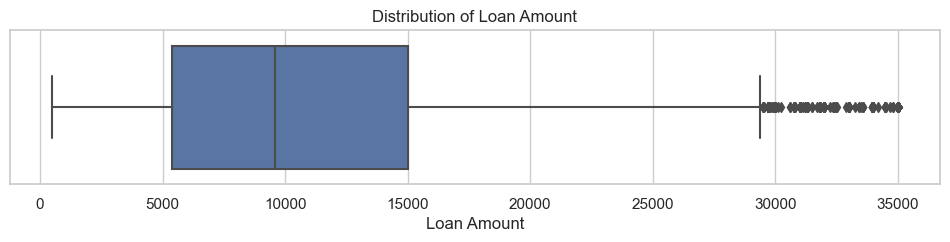

In [61]:
## starting with loan_amnt
plt.figure(figsize=(12, 2))
sns.boxplot(x='loan_amnt', data=loan_data)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()
## Upper fence turns out to be 29.175k =29175 whereas max is 35k=35000 which is not much more then upper fence thus will not have much impact on the analysis.

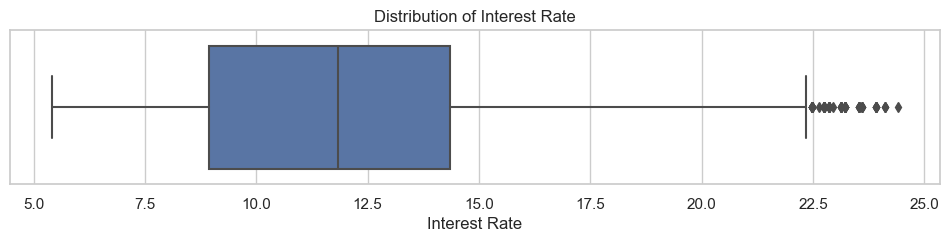

In [55]:
## starting with int_rate
plt.figure(figsize=(12, 2))
sns.set(style="whitegrid")
sns.boxplot(x='int_rate', data=loan_data)
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.show()
## Upper fence turns out to be 22.64 whereas max is 24.4 which is not much more then upper fence thus will not have much impact on the analysis.

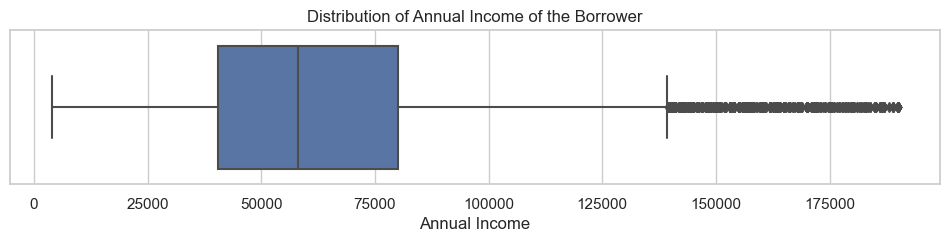

In [57]:
## starting with annual_inc
plt.figure(figsize=(12, 2))
sns.boxplot(x='annual_inc', data=loan_data)
plt.title('Distribution of Annual Income of the Borrower')
plt.xlabel('Annual Income')
plt.show()
## Upper fence turns out to be 146k whereas max is 6000k which is much from upper fence thus we will remove the outliers in column annual_inc.

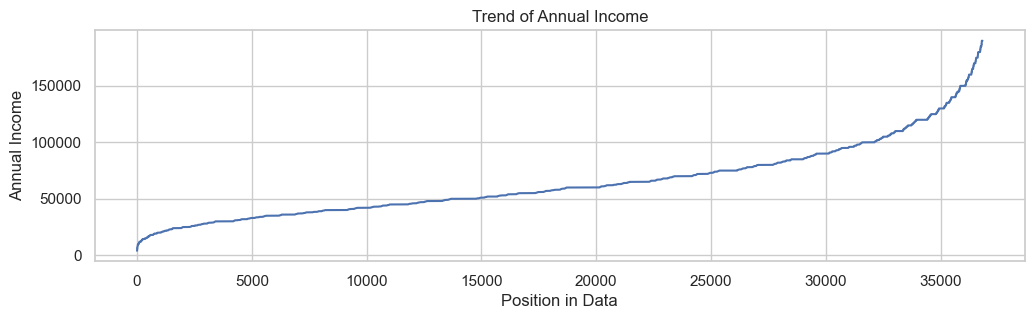

In [60]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers

sorted_annual_inc = loan_data.annual_inc.sort_values().reset_index(drop=True)
plt.figure(figsize=(12, 3))
plt.plot(sorted_annual_inc.index, sorted_annual_inc.values)
plt.title('Trend of Annual Income')
plt.xlabel('Position in Data')
plt.ylabel('Annual Income')
plt.show()

As it can be observed from the line chart, the annual_inc is increasing in expontntial format around 99th percentile. Thus we can remove values greater than 99th percentile.

In [42]:
## Removing outliers in annual_inc greater than 99th percentile
loan_data = loan_data[loan_data.annual_inc<=np.percentile(loan_data.annual_inc,99)]

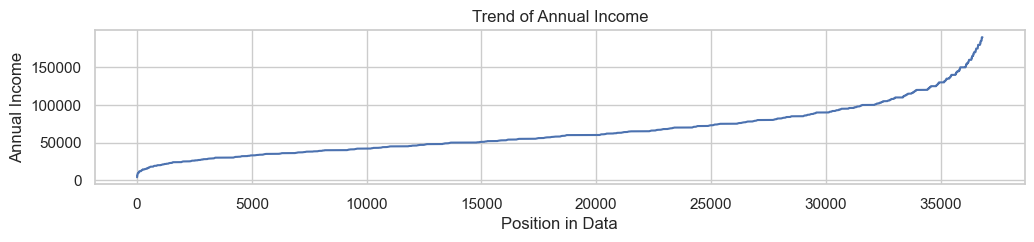

In [62]:
## checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
sorted_annual_inc = loan_data.annual_inc.sort_values().reset_index(drop=True)
plt.figure(figsize=(12, 2))
sns.lineplot(x=sorted_annual_inc.index, y=sorted_annual_inc.values)
plt.title('Trend of Annual Income')
plt.xlabel('Position in Data')
plt.ylabel('Annual Income')
plt.show()

As the trend is more compatible with the analysis, we can proceed with analysis of column 'dti'.

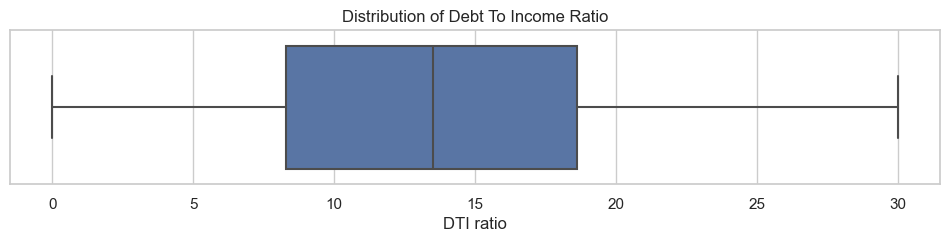

In [63]:
## starting with dti
plt.figure(figsize=(12, 2))
sns.boxplot(x='dti', data=loan_data)
plt.title('Distribution of Debt To Income Ratio')
plt.xlabel('DTI ratio')
plt.show()
## There are no outliers in dti hence we can move ahead with analysis.

The data has been cleaned and outliers removed, we can move ahead with the analysis.

### Univariate Analysis

Fully Paid     85.580932
Charged Off    14.419068
Name: loan_status, dtype: float64


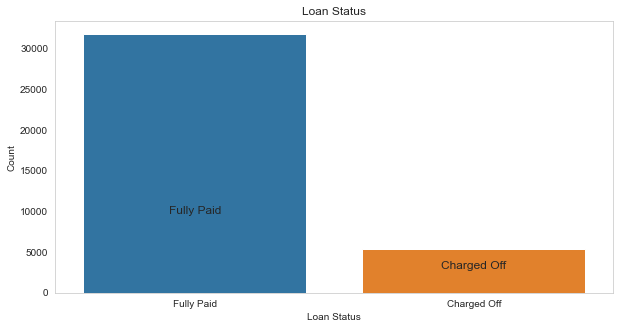

In [45]:
# Loan status 
print(loan_data.loan_status.value_counts()*100/loan_data.loan_status.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data.loan_status)
ax.annotate('Fully Paid',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('Charged Off',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

**Inference:** Defaulted loan are low in numbers compared to Fully Paid.

count    36820.000000
mean     10963.928571
std       7220.753722
min        500.000000
25%       5375.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


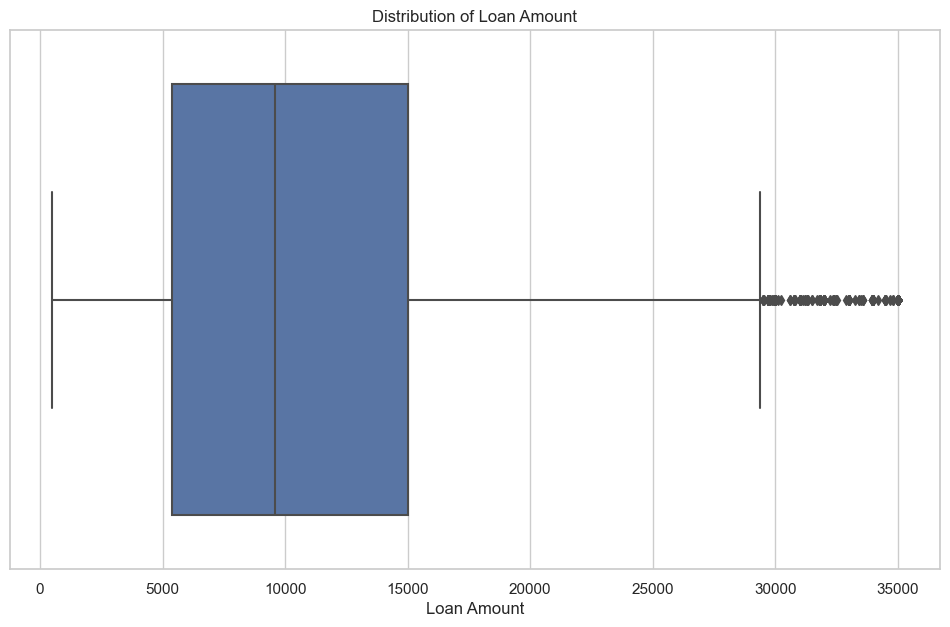

In [64]:
# Loan Amount
print(loan_data.loan_amnt.describe())
plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_amnt', data=loan_data)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

**Inference**: The loan amount varies from 500 to 35000 with a mean of 9800.

36    75.37729
60    24.62271
Name: term, dtype: float64


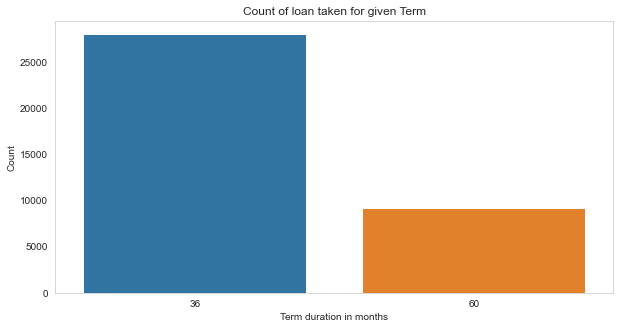

In [47]:
# Term of loan 
print(loan_data.term.value_counts()*100/loan_data.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(loan_data.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

**Inference**: More than half of the loan taken has term of 36 months compared to 60 months.

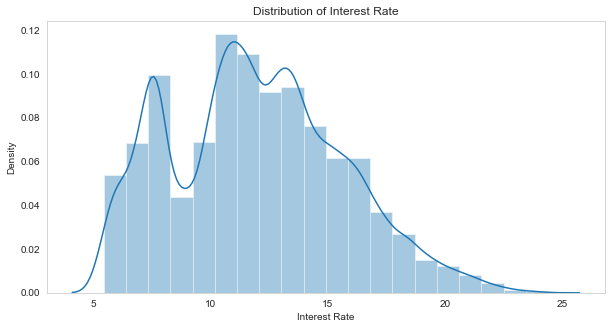

In [48]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_data.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

**Inference**: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

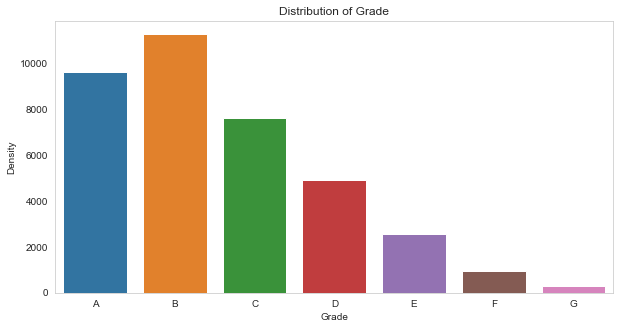

In [49]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(loan_data.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

**Inference**: A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

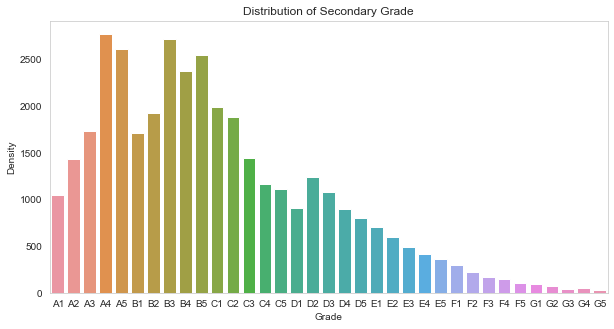

In [50]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(loan_data.sub_grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

**Inference**: A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution.

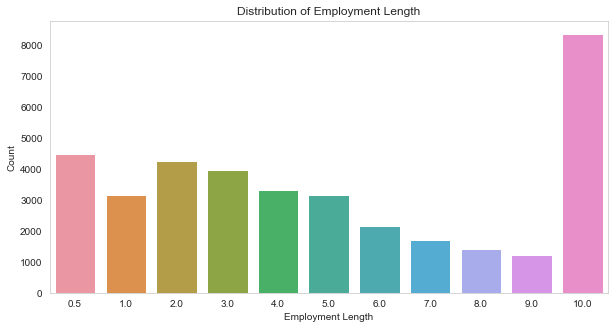

In [51]:
# Distribution of emp_length
plt.figure(figsize=(10,5))
sns.countplot(loan_data.emp_length)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

**Inference**: Majority of borrowsers have working experience greater than 10 years.

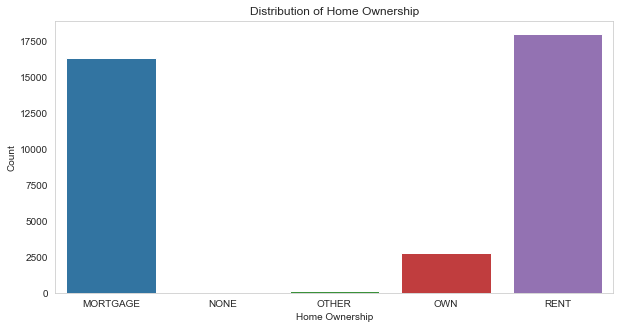

In [52]:
# Distribution of home_ownership
plt.figure(figsize=(10,5))
sns.countplot(loan_data.home_ownership)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=12)
plt.show()

**Inference**: Majority of borrowsers don't posses property and are on mortage or rent.

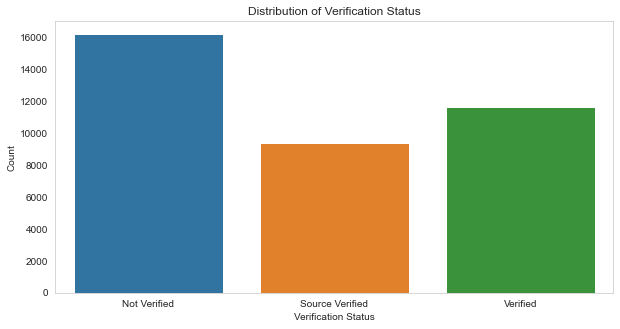

In [53]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(loan_data.verification_status)
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

**Inference**: About 50% of the borrowers are verified by the company or have source verified.

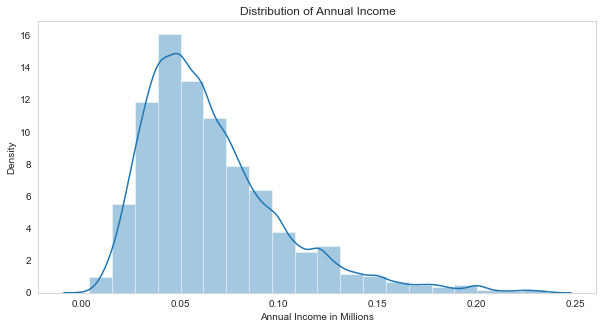

In [54]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(loan_data.annual_inc/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

**Inference**: Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

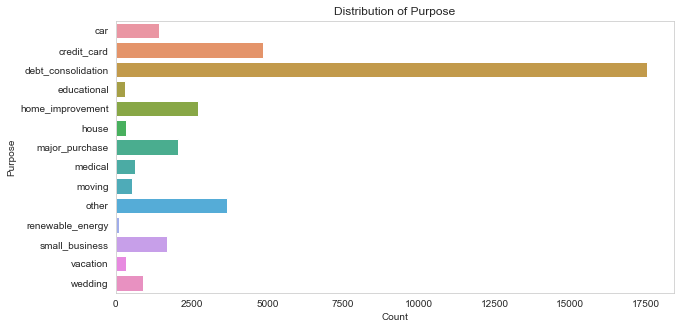

In [55]:
# Distribution of purpose
plt.figure(figsize=(10,5))
sns.countplot(y=loan_data.purpose)
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

**Inference**: A large percentage of loans are taken for debt consolidation followed by credit card.

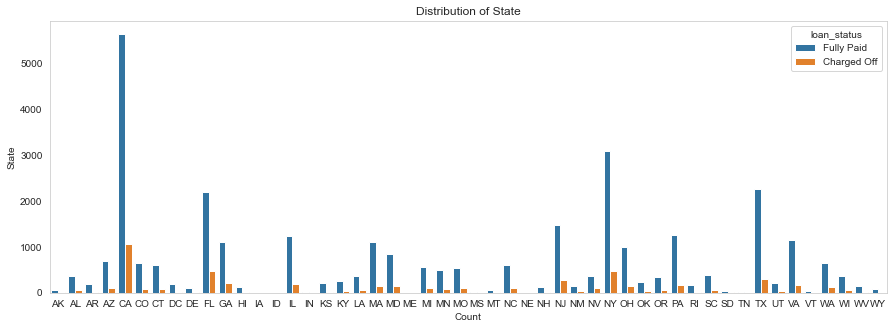

In [75]:
# Distribution of addr_state
plt.figure(figsize=(15,5))
sns.countplot(loan_data.addr_state,hue=loan_data.loan_status)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State',fontsize=12)
plt.show()

**Inference**: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.

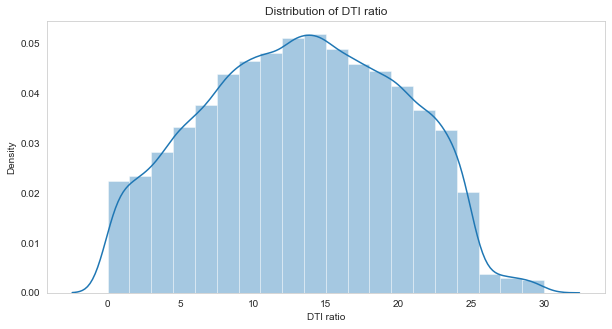

In [57]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(loan_data.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

**Inference**: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

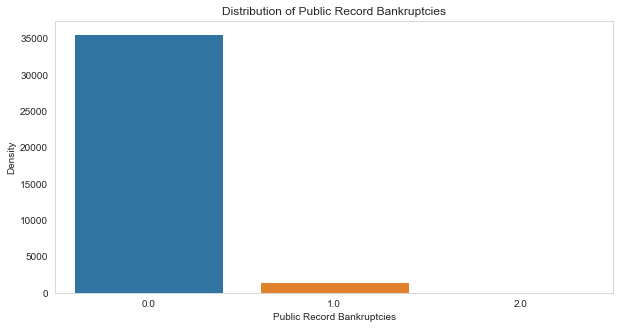

In [58]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(loan_data.pub_rec_bankruptcies)
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

**Inference**: Majority of the borrowers have no record of Public Recorded Bankruptcy.

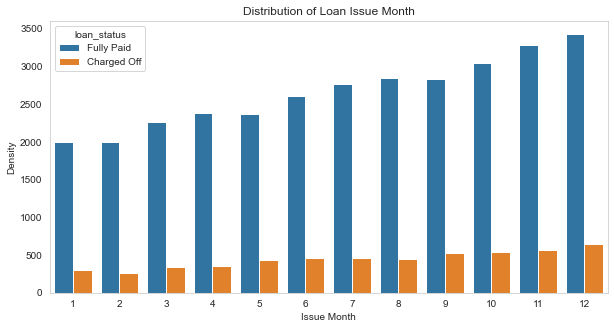

In [76]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(loan_data.issue_month,hue=loan_data.loan_status)
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

**Inference**: Majority of the loans are given in last quarter of the year.

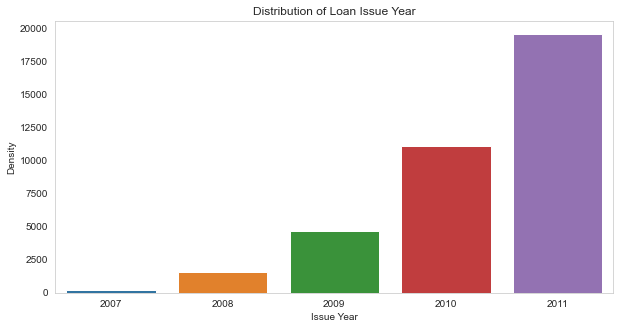

In [60]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(loan_data.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

**Inference**: The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis

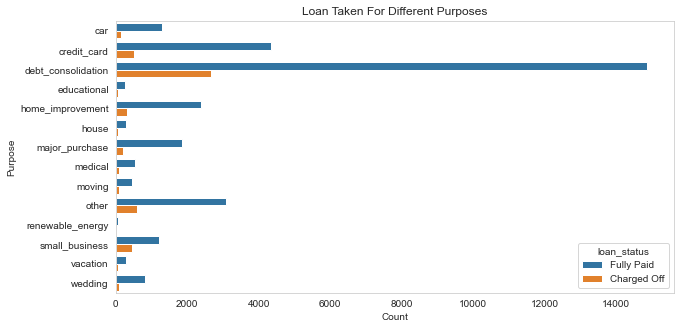

In [61]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

**Inference:** Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

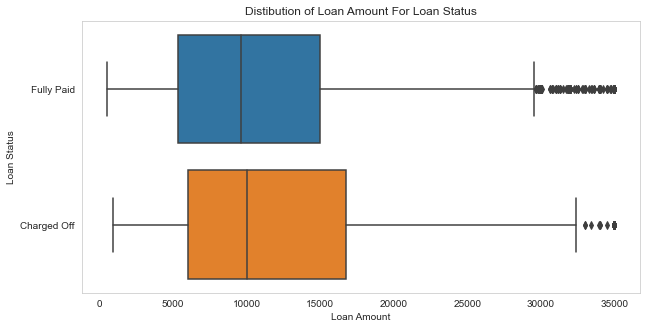

In [62]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

**Inference:** The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

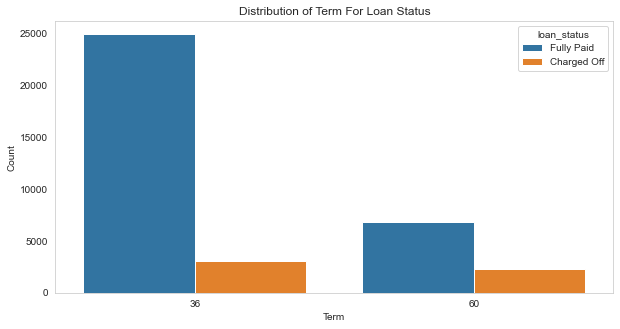

In [63]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

**Inference:** The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

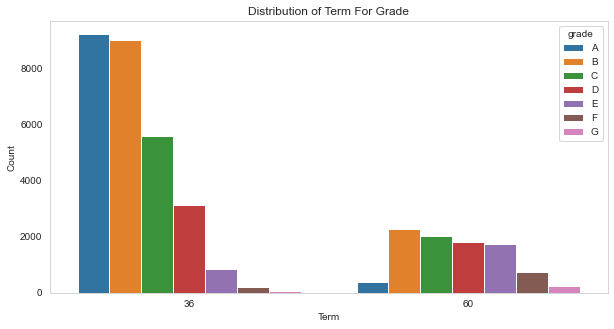

In [64]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

**Inference:** The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

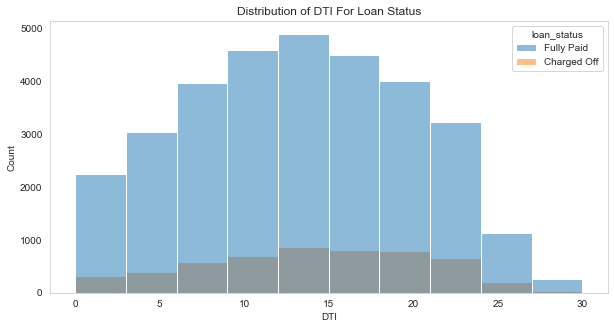

In [65]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

**Inference:** The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

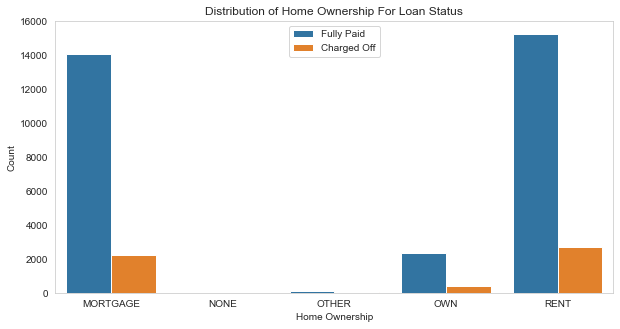

In [66]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

**Inference:** The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.

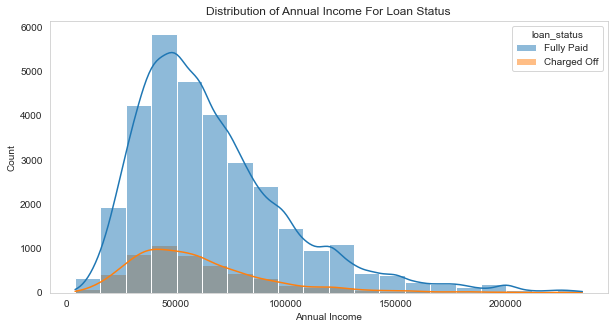

In [67]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

**Inference:** Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

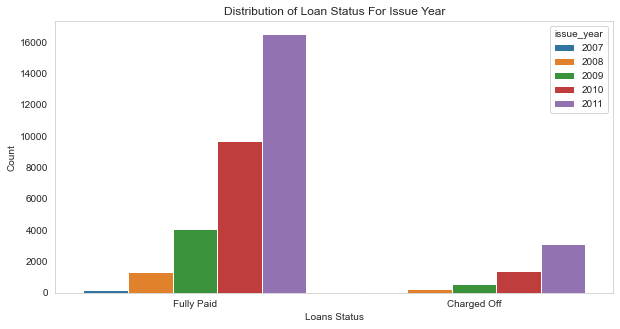

In [68]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

**Inference:** The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

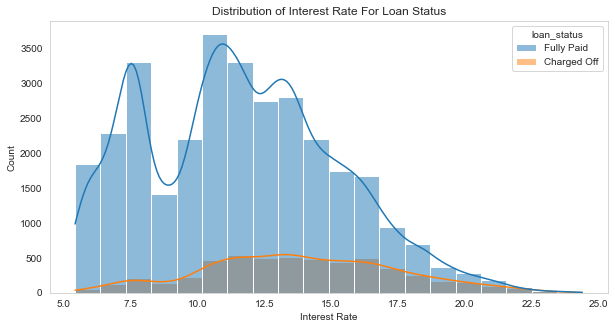

In [69]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

**Inference:** The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

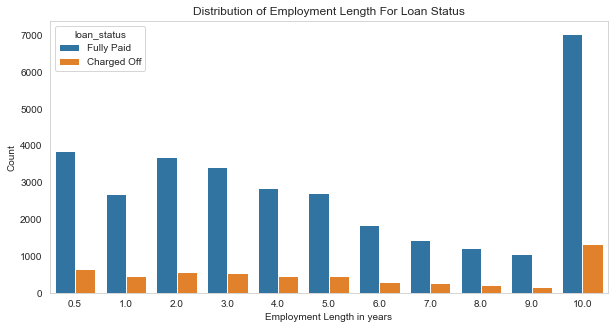

In [70]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

**Inference:** The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis

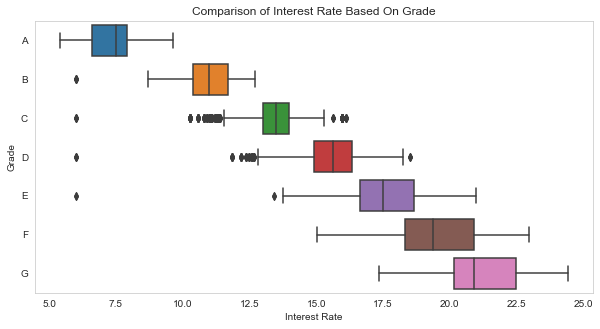

In [71]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

**Inference:** The Grade represent risk factor thus we can say interst rate increases with the risk.

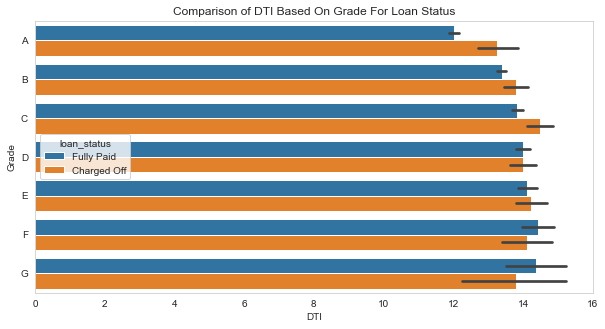

In [72]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

**Inference:** The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.

<Figure size 720x360 with 0 Axes>

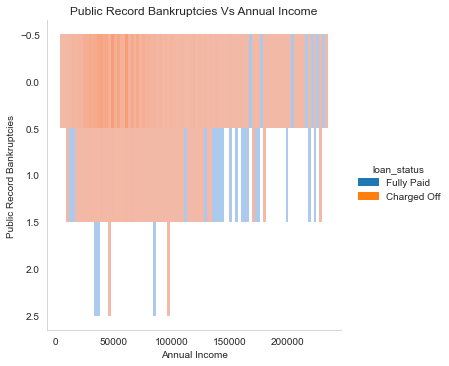

In [73]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

**Inference:** The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

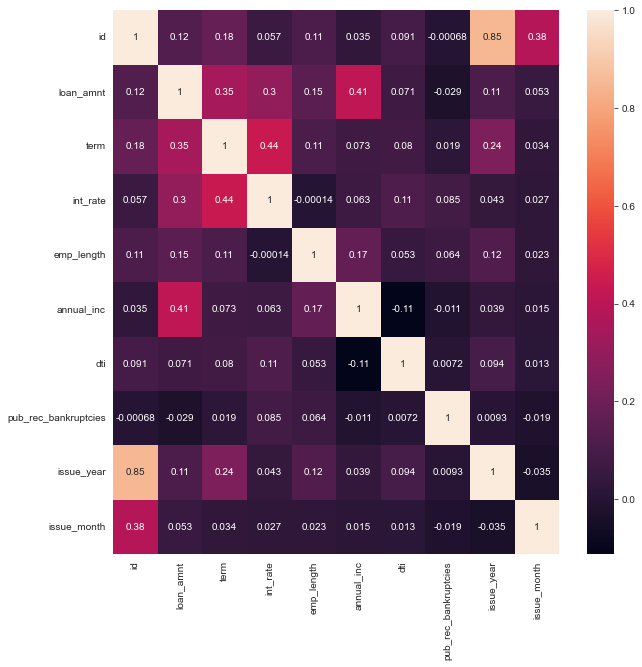

In [77]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()

## Insights
### Univariate Analysis
 - The number of defaulted loan is 7 times less than the number of fully paid loan.
 - The majority of loan has a term of 36 months compared to 60 months.
 - The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
 - A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
 - Majority of borrowsers have working experience greater than 10 years.
 - Majority of borrowsers don't posses property and are on mortage or rent.
 - About 50% of the borrowers are verified by the company or have source verified.
 - Annual Income shows left skewed normal distribution thus we can say that the majorityof burrowers have very low annual income compared to rest.
 - A large percentage of loans are taken for debt consolidation followed by credit card.
 - Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
 - Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
 - Majority of the borrowers have no record of Public Recorded Bankruptcy.
 - Majority of the loans are given in last quarter of the year.
 - The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

### Segmented Univariate Analysis
 - Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
 - The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
 - The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
 - The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
 - The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
 - The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
 - The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

### Bivariate Analysis
 - The Grade represent risk factor thus we can say interst rate increases with the risk.
 - The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
 - The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

Recommendations
- Major Driving factor which can be used to predict the chance of defaulting and avoiding Credit Loss:
    1. DTI 
    2. Grades
    3. Verification Status
    4. Annual income
    5. Pub_rec_bankruptcies
- Other considerations for 'defaults' :
    1. borrowers not from large urban cities like california, new york, texas, florida etc. 
    2. borrowers having annual income in the range 50000-100000.
    3. borrowers having Public Recorded Bankruptcy.
    4. borrowers with least grades like E,F,G which indicates high risk.
    5. borrowers with very high Debt to Income value.
    6. borrowers with working experience 10+ years.

# Extra analysis

Text(0, 0.5, 'count')

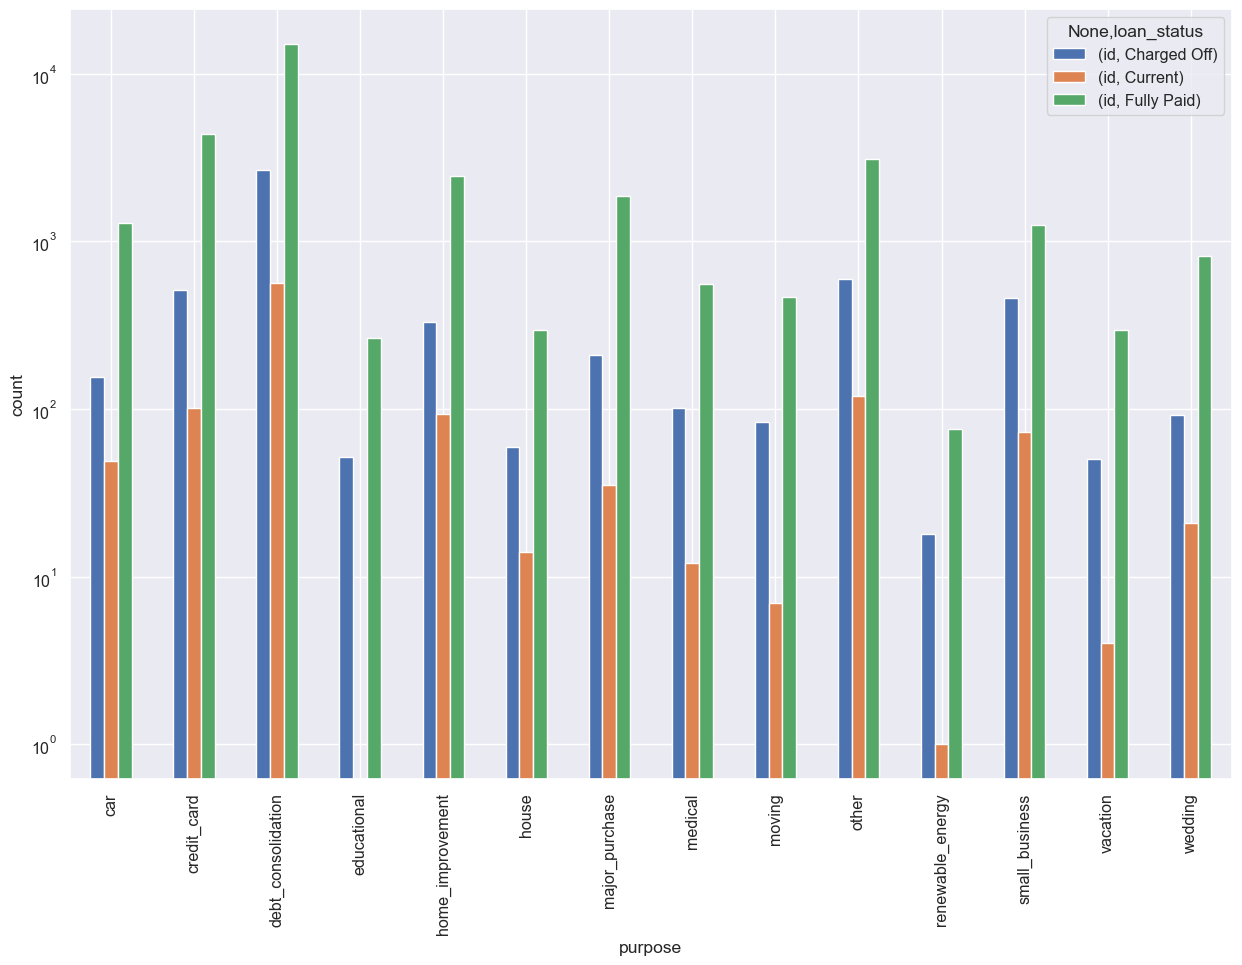

In [148]:
sns.set(font_scale=1.05)
ax=pd.pivot_table(loan_data,index=['purpose'],columns=['loan_status'], values=['id'], aggfunc='count').plot.bar(figsize=[15,10])
ax.set_yscale('log')
ax.set_ylabel('count')

<Axes: xlabel='purpose', ylabel='loan_status'>

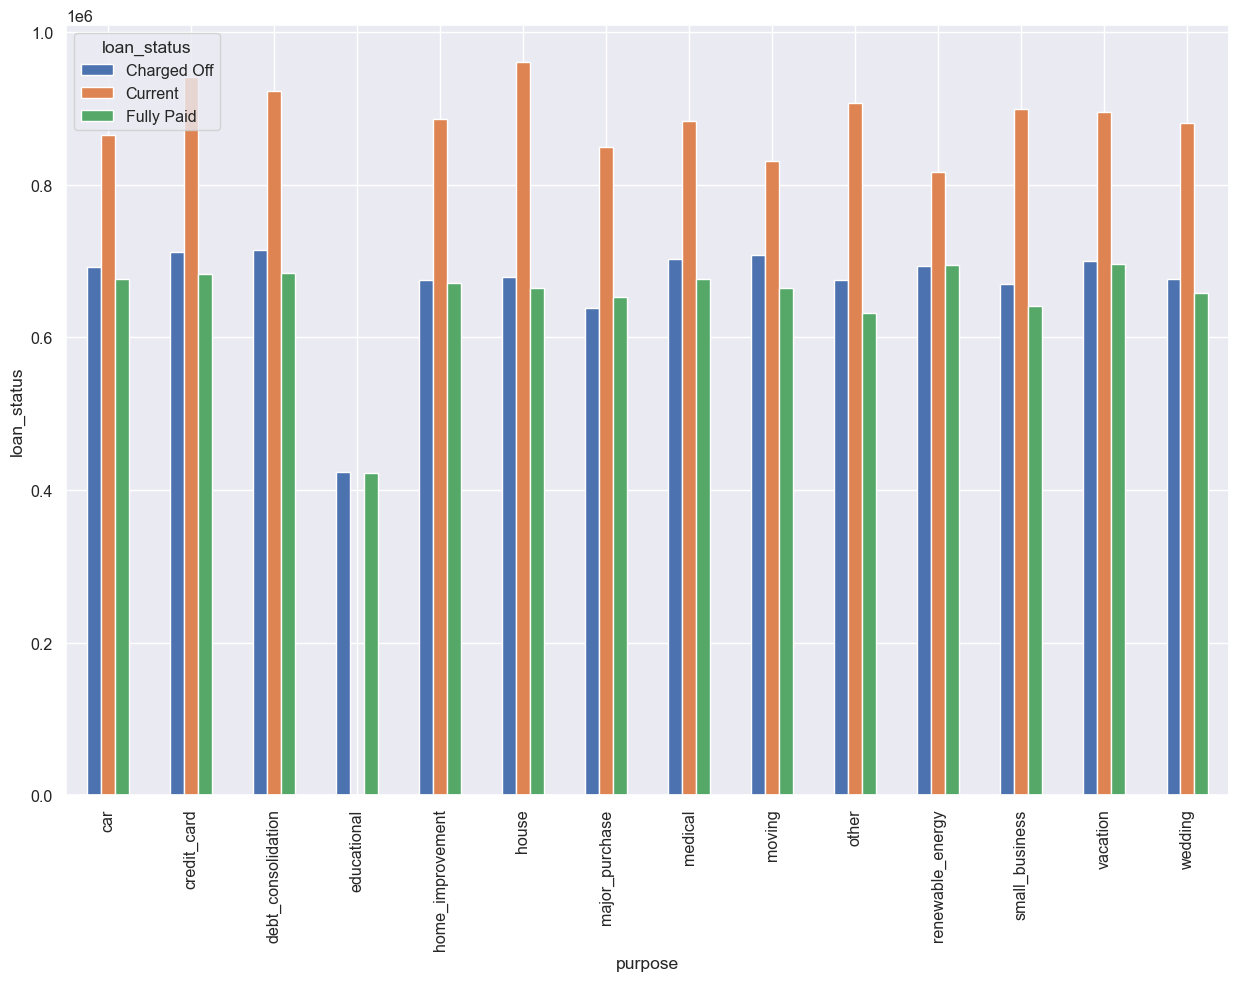

In [183]:
pd.pivot_table(loan_data,index=['purpose'],columns=['loan_status'],values='id',aggfunc=np.mean).plot.bar(figsize=[15,10],ylabel='loan_status')

# Observations
Borrower with higher annual_inc go for higher loan amount

<Axes: xlabel='annual_inc', ylabel='loan_amnt'>

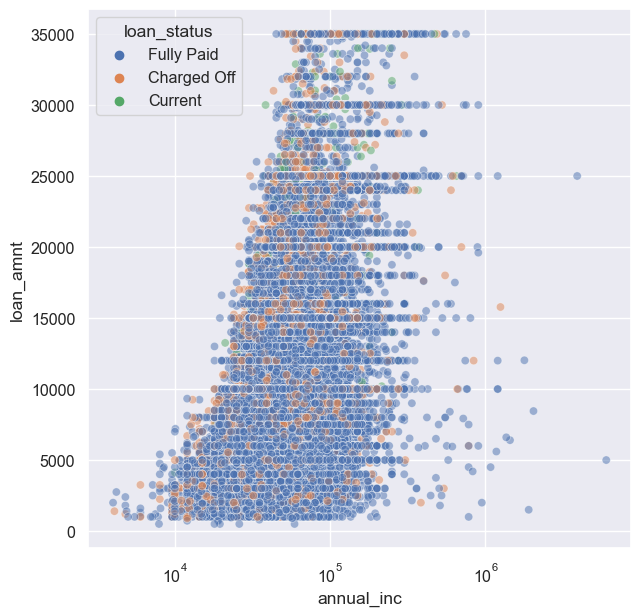

In [184]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.scatterplot(data=loan_data, hue='loan_status', x='annual_inc', y='loan_amnt', alpha=0.5, ax=ax)

# Observations

    credit_card, debt_consolidation, home_improvement, major_purchase are the purposes that have more than 2000 count and at least 10% default rate
    Median of small business loans are highest and their default rate is also highest.
    Most of the money is invested in debt_consolidation and their default rate is also pretty high (above 15%).



Text(0.5, 0, 'Median of loans')

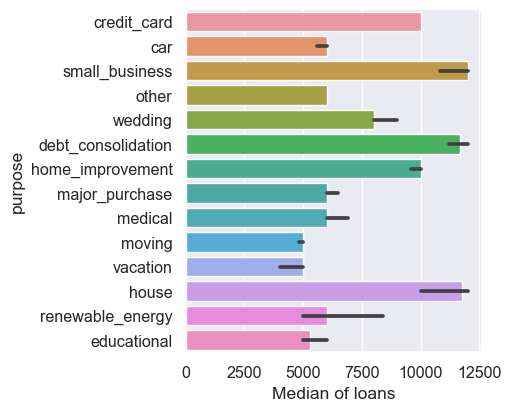

In [185]:
fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
sns.barplot(data=loan_data, y='purpose', x='loan_amnt', estimator=np.median, orient='h', ax=ax)
ax.set_xlabel('Median of loans')

Text(0.5, 0, 'Sum of loans')

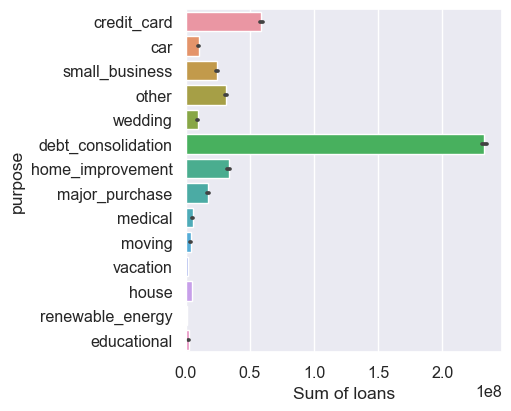

In [188]:
fig, ax = plt.subplots(figsize=[5, 4], constrained_layout=True)
sns.barplot(data=loan_data, y='purpose', x='loan_amnt', estimator=np.sum, orient='h', ax=ax)
ax.set_xlabel('Sum of loans')

<Axes: xlabel='home_ownership'>

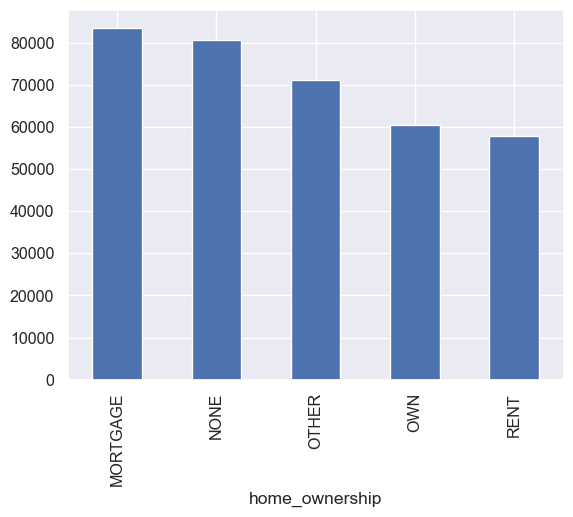

In [190]:
loan_data.groupby('home_ownership')['annual_inc'].mean().plot.bar()

# Observations
1. Borrowers who went bankrupt before are most likely to default. People having 2 records of bankruptcies have a higher probability to default than people with no bankruptcy report

<Axes: xlabel='pub_rec_bankruptcies', ylabel='loan_status'>

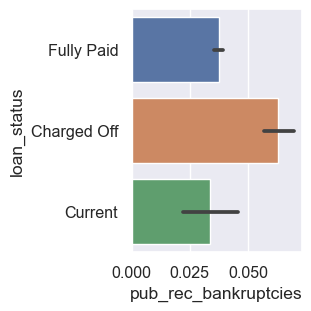

In [192]:
fig, ax = plt.subplots(figsize=[3, 3], constrained_layout=True)
sns.barplot(data=loan_data, x='pub_rec_bankruptcies', y='loan_status')

<Axes: xlabel='emp_length'>

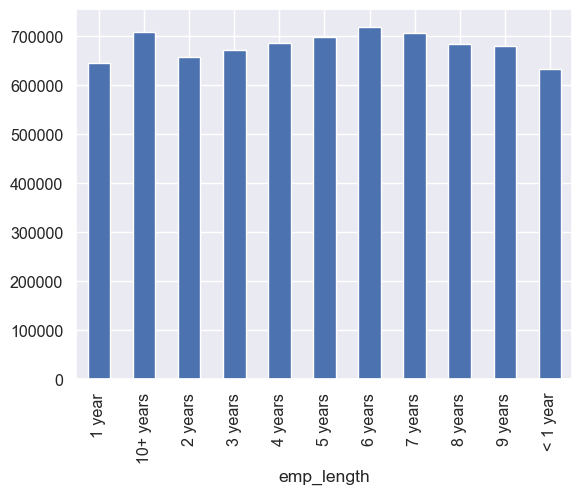

In [194]:
loan_data.groupby('emp_length')['id'].mean().plot.bar()